## Plot Diff

This uses a labelled directory of frames (not used for training) to compare a model's predictions with the ground truth. This is plotted to make an easy way to see how extreme the differences in prediction/ground truth are.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the trained model (replace 'model.h5' with the path to your .h5 model file)
model = tf.keras.models.load_model('../models/expanded_vertical_speed_model.h5')

# Function to preprocess an input image
def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict the vertical speed
def predict_airspeed(image_path):
    # Preprocess the input image
    preprocessed_image = preprocess_image(image_path)

    # Make a prediction using the model
    predictions = model.predict(preprocessed_image)

    # Convert the prediction to a vertical speed value (you may need to adjust this based on your label encoding)
    predicted_speed = np.argmax(predictions, axis=1)  # Assuming one-hot encoding

    return predicted_speed[0] * 4


# Function to predict the vertical speed
def predict_vertical_speed(image_path):
    # Preprocess the input image
    preprocessed_image = preprocess_image(image_path)

    # Make a prediction using the model
    predictions = model.predict(preprocessed_image)

    # Convert the prediction to a vertical speed value (you may need to adjust this based on your label encoding)
    predicted_speed = np.argmax(predictions, axis=1)  # Assuming one-hot encoding

    return (predicted_speed[0] * .25) - 6

In [3]:
image_directory = '../media/daytime_fixed_A10C_original_validation_VS/'
csv_file = '../image_labels/vertical_speed_validation_labels.csv'

df = pd.read_csv(csv_file)

def apply_prediction(row):
    image_path = row['image_path']
    result = predict_vertical_speed(image_directory + "/" + image_path)
    return result

df['predicted_airspeed'] = df.apply(apply_prediction, axis=1)

# df.to_csv('../image_labels/diffed_labels/night_vertical_speed_validation_diffed.csv', index=False)

1/1 [==============================] - 0s 9ms/step


## Plot Ground Truth and Prediction over frames

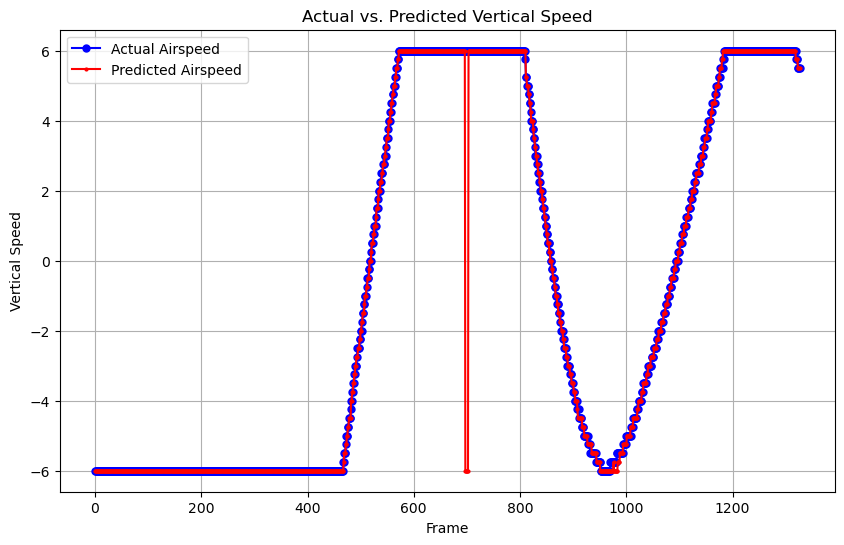

In [4]:
# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))

# Plot actual airspeed as a blue line
plt.plot(df['airspeed'], marker='o', linestyle='-', markersize=5, color='blue', label='Actual Airspeed')

# Plot predicted airspeed as a red line
plt.plot(df['predicted_airspeed'], marker='o', markersize=2, linestyle='-', color='red', label='Predicted Airspeed')

# Labeling and titles
plt.xlabel('Frame')
plt.ylabel('Vertical Speed')
plt.title('Actual vs. Predicted Vertical Speed')
plt.legend()
plt.grid(True)

# Show plot

plt.savefig('Vertical_Speed_V2_daytime_validation.png', dpi=300, bbox_inches='tight')

plt.show()

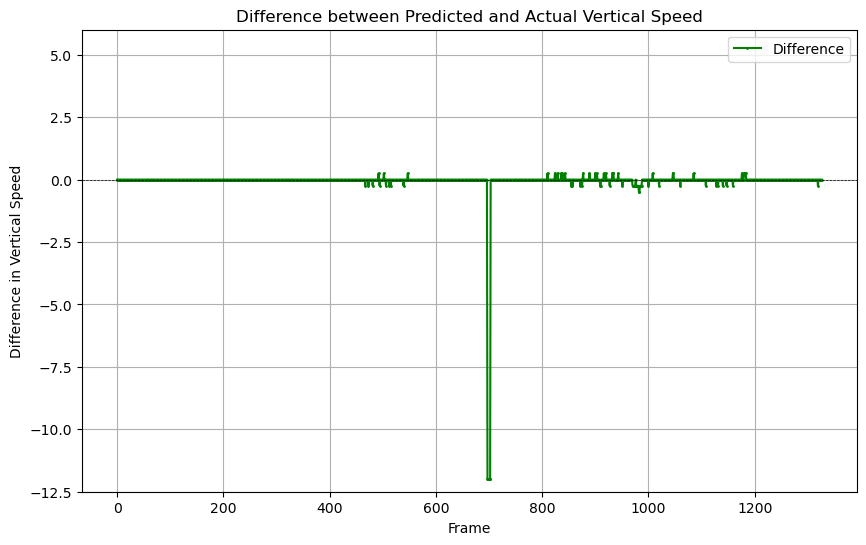

In [7]:
# Calculate the difference between predicted and actual airspeed
df['difference'] = df['predicted_airspeed'] - df['airspeed']

# Create a line plot for the difference
plt.figure(figsize=(10, 6))

# Plot the difference between predicted and actual airspeed
plt.plot(df['difference'], marker='o', linestyle='-', color='green', label='Difference', markersize=1)

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Labeling and titles
plt.xlabel('Frame')
plt.ylabel('Difference in Vertical Speed')
plt.ylim(-12.5,6)
plt.title('Difference between Predicted and Actual Vertical Speed')
plt.legend()
plt.grid(True)

# Show plot
plt.savefig('Vertical_Speed_V2_daytime_validation_diff.png', dpi=300, bbox_inches='tight')

plt.show()